# **CNN with Data Augmentation & Dropout on MNIST**

In [ ]:
import tensorflow as tf       #importing package
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

**Checking Tensor Flow version**

In [ ]:
print("TensorFlow version:", tf.__version__)

tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.19.0


**Load MNIST Dataset**

> Add blockquote



In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = x_train[..., tf.newaxis]
x_test  = x_test[..., tf.newaxis]

print("Train Shape:", x_train.shape)
print("Test Shape :", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Shape: (60000, 28, 28, 1)
Test Shape : (10000, 28, 28, 1)


**Data Augmentation Layer**

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
], name="data_augmentation")

** Build Improved CNN Model**

In [ ]:
model = models.Sequential([

    layers.Input(shape=(28,28,1)),

    # Data Augmentation (only active during training)
    data_augmentation,

    # Block 1
    layers.Conv2D(32, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.30),

    # Block 3
    layers.Conv2D(128, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.30),

    layers.Flatten(),

    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),

    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,330 (1.50 MB)

 Trainable params: 391,370 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

**Compile Model**

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


**Early Stopping Callback**

*   List item
*   List item



In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

**Train Model**

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.6088 - loss: 1.1968 - val_accuracy: 0.9546 - val_loss: 0.1895
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9137 - loss: 0.2730 - val_accuracy: 0.9839 - val_loss: 0.0458
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9409 - loss: 0.1954 - val_accuracy: 0.9844 - val_loss: 0.0514
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9509 - loss: 0.1589 - val_accuracy: 0.9841 - val_loss: 0.0497
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9587 - loss: 0.1342 - val_accuracy: 0.9867 - val_loss: 0.0444
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9629 - loss: 0.1200 - val_accuracy: 0.9902 - val_loss: 0.0334
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9663 - loss: 0.1103 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9678 - loss: 0.1057 - val_acc

**Plot Accuracy & Loss**

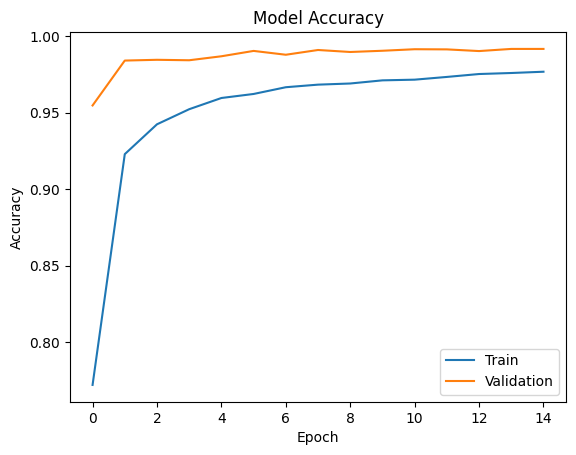

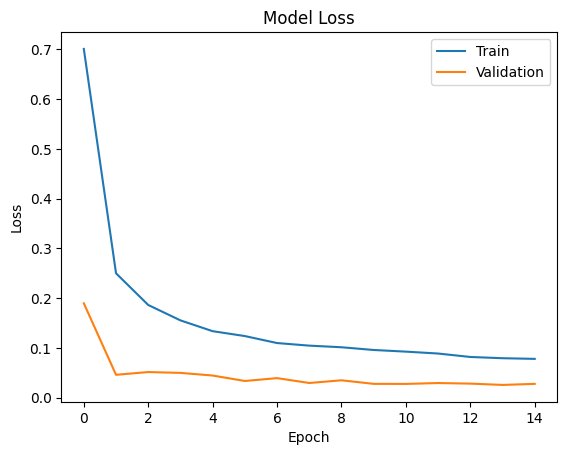

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

**Evaluate Model**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc,4))
print("Test Loss:", round(test_loss,4))


Test Accuracy: 0.9915
Test Loss: 0.0255


**Show Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


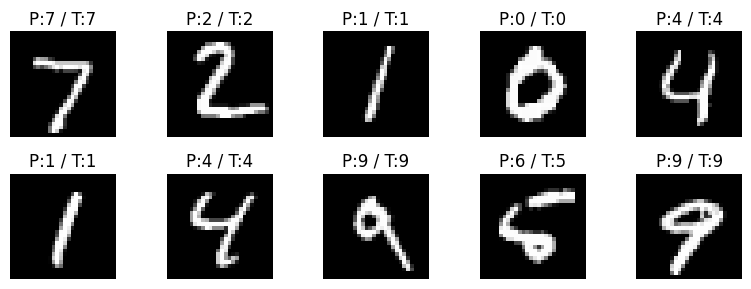

In [ ]:
preds = model.predict(x_test[:10])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"P:{pred_labels[i]} / T:{y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


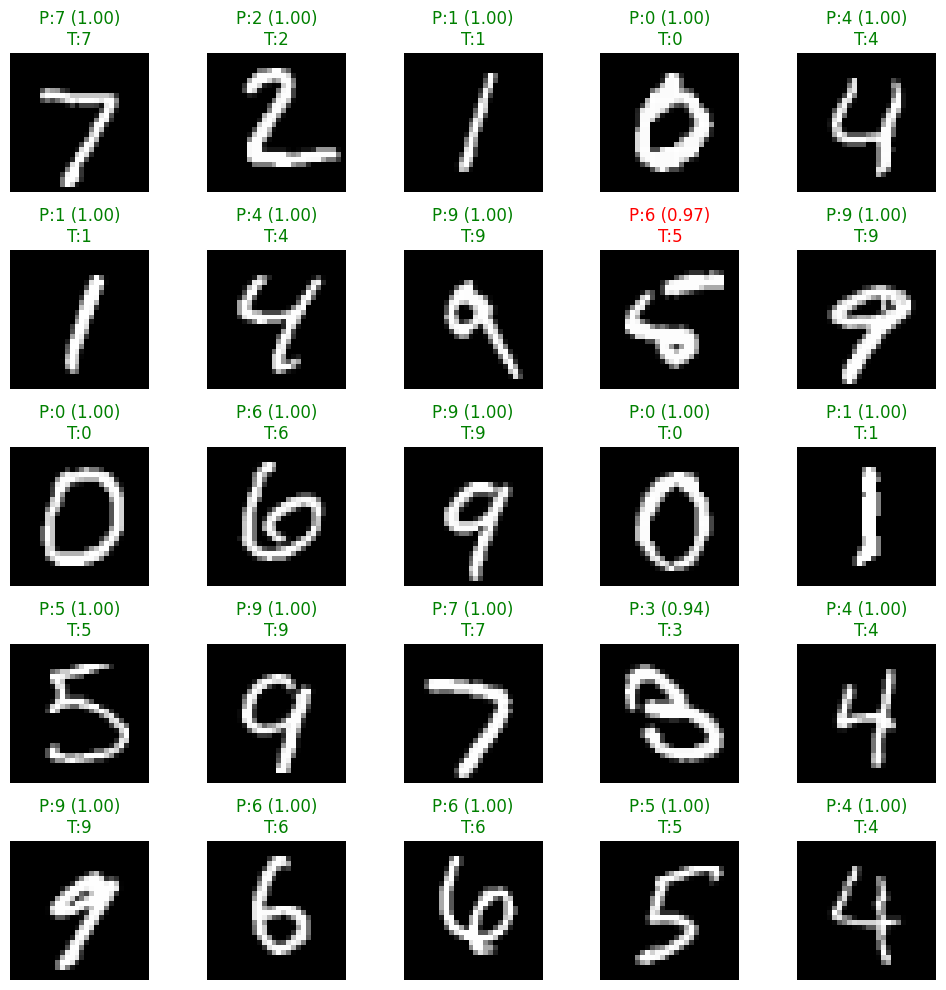

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")

    true_label = y_test[i]
    pred_label = predicted_labels[i]
    confidence = np.max(predictions[i])

    # Color coding
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.title(f"P:{pred_label} ({confidence:.2f})\nT:{true_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()